# Lecture Week 7 Wed 11/13

Survey feed back:

1. Notes are helpful

2. Slow down on coding/More coding in lecture

Some tips about coding:

1. For data science, coding is a tool to solve problems. We already have all we need (writing loops, using class, etc), just might need more familiarity with the tool.

2. Gain familiarity by practicing, e.g. doing homework problem. 

3. There is no need to remember how to use specific methods or functions in this class.

4. Google or ChatGPT is encouraged -- ask questions instead of asking for the answer. For example, intead of copying the questions and ask for the answer, you can ask "how to remove missing data for a specific features in a dataframe".


## Logistic Regression for Multiclass Classification

In this part, we consider logistic regression for K > 2 classes. 
We have data $(\mathbf{x}_i, y_i)$ for i = 1, 2, ..., N, where $\mathbf{x}_i\in\mathbb{R}^p$ is the input/feature and $y_i$ is the output/label, which indicates the class of the input.

We treat the output $y_i$ as a categorical variable, which indicates the class of the input.

## Model

We consider the augmented data $\mathbf{x}_i = [1, x_{i1}, x_{i2}, ..., x_{ip}]$ for i = 1, 2, ..., N, where $\mathbf{x}_{ij}$ is the j-th feature of the i-th input, and we assume that the output $y_i$ can take K different values, 1, ..., K

We assume the the probability of the input $\mathbf{x}$ belonging to class 1 to K is given by a vector of probabilities.

$$
f(\mathbf{x}) = 
\begin{bmatrix}
f_1(\mathbf{x}) \\
f_2(\mathbf{x}) \\
\vdots \\
f_K(\mathbf{x})
\end{bmatrix}
=
\frac{1}{\sum_{k=1}^K \exp(\mathbf{w}_k^T\mathbf{x})}
\begin{bmatrix}
\exp(\mathbf{w}_1^T\mathbf{x}) \\
\exp(\mathbf{w}_2^T\mathbf{x}) \\
\vdots \\
\exp(\mathbf{w}_K^T\mathbf{x})
\end{bmatrix}
$$

- $\mathbf{w}_i = [w_{i0}, w_{i1}, w_{i2}, ..., w_{ip}]$ is the $p+1$ dimensional vector of coefficients for class $i$

- $f_j(\mathbf{x};\mathbf{W})$ is the probability of the input $\mathbf{x}$ belonging to class j.
By construction, $\sum_{j=1}^K f_j(\mathbf{x}; \mathbf{W}) = 1$ for all $\mathbf{x}$. That is, the probabilities of the input $\mathbf{x}$ belonging to class 1 to K sum to 1.

- $\mathbf{W}$ is the matrix of all the unknown coefficients $\mathbf{w}_i$ for i = 1, 2, ..., K.

$$
\mathbf{W} =
\begin{bmatrix}
\mathbf{w}_1^T \\
\mathbf{w}_2^T \\
\vdots \\
\mathbf{w}_K^T
\end{bmatrix}
=
\begin{bmatrix}
w_{10} & w_{11} & \cdots & w_{1p} \\
w_{20} & w_{21} & \cdots & w_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
w_{K0} & w_{K1} & \cdots & w_{Kp}
\end{bmatrix}
$$

where $w_{ij}$ is the j-th coefficient for class i.

Therefore we also write $f(\mathbf{x}; \mathbf{W})$ to indicate the dependence of the probabilities on the coefficients $\mathbf{W}$.



## Cross-entropy loss

Define the indicator variable $y_{ik}$ as

$$
y_{ik} = 
\begin{cases}
1 & \text{if } y_i \text{ is class k} \\
0 & \text{otherwise}
\end{cases}
$$

Essentiall, we encode the categorical variable $y_{i}$ as a vector in $\mathbb{R}^K$ with a 1 at the k-th position and 0 elsewhere.

The cross-entropy loss is given by

$$
L(\mathbf{W}) = -\sum_{i=1}^N \sum_{k=1}^K y_{ik}\log(f_k(\mathbf{x}_i; \mathbf{W}))
$$

And the optimal weight matrix $\mathbf{W}$ is obtained by minimizing the loss function $L(\mathbf{W})$.

All this is saying that, for each individual input, say $\mathbf{x}_1$ belong to class 2, then the contribution to the loss is given by $-\log(f_2(\mathbf{x}_1; \mathbf{W}))$. 

If $f_2(\mathbf{x}_1; \mathbf{W})$ -- the probability of $\mathbf{x}_1$ belonging to class 2 --
is close to 100%, then the loss is close to 0. If $f_2(\mathbf{x}_1; \mathbf{W})$ is close to 0%, then the loss is large.

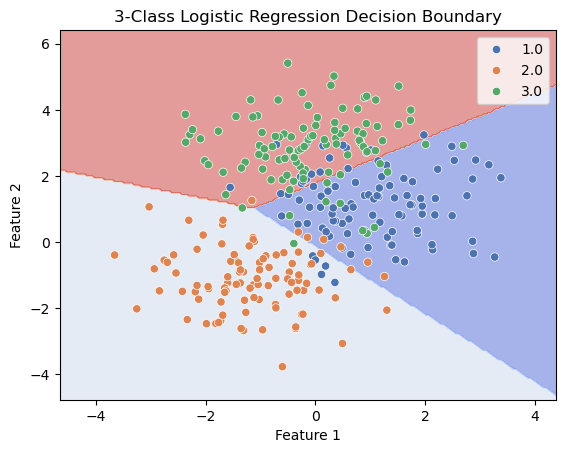

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns


# Set random seed for reproducibility
np.random.seed(0)

# Number of samples per class
N = 100
sig = 1

# Generate data for three classes, each class has a different mean
x_class1 = np.random.multivariate_normal([1, 1], sig*np.eye(2), N)
x_class2 = np.random.multivariate_normal([-1, -1], sig*np.eye(2), N)
x_class3 = np.random.multivariate_normal([0, 3], sig*np.eye(2), N)

# Combine into a single dataset
X = np.vstack((x_class1, x_class2, x_class3))
y = np.concatenate((np.ones(N), 2*np.ones(N), 3*np.ones(N)))

# Create a logistic regression classifier with multinomial option for multi-class
clf = LogisticRegression()
clf.fit(X, y)

# Plot the decision boundaries using DecisionBoundaryDisplay
fig, ax = plt.subplots()
db_display = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    grid_resolution=200,
    response_method="predict",  # Can be "predict_proba" for probability contours
    alpha=0.5,
    cmap='coolwarm',
    ax=ax
)
# Scatter plot of the data points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax, palette='deep')


# Adding title and labels
ax.set_title('3-Class Logistic Regression Decision Boundary')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# Show plot
plt.show()


Exercise: 

Load the penguins dataset. Use `bill_length_mm`, `bill_depth_mm` to predict the `species` of the penguins. Draw the confusion matrix.

accuracy: 0.9640
Confusion Matrix:
 [[144   2   0]
 [  4  60   4]
 [  0   2 117]]


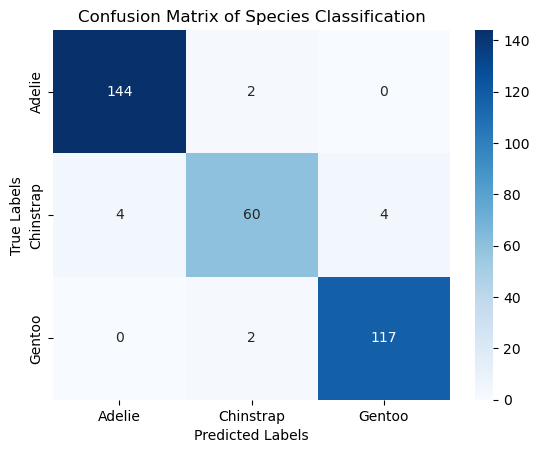

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Load the dataset
df = sns.load_dataset('penguins')

# Drop rows with missing values
df.dropna(inplace=True)

features = ['bill_length_mm', 'bill_depth_mm']

# Select features
X = df[features]
y = df['species']

# Initialize and train the logistic regression model
clf = LogisticRegression()
clf.fit(X, y)

# Calculate the training and test accuracy
score = clf.score(X, y)
print(f"accuracy: {score:.4f}")

# Predict on the test set
y_pred = clf.predict(X)

# Evaluate the model
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Species Classification')
plt.show()


## with train test split


Training accuracy: 0.9699
Test accuracy: 0.9641
Confusion Matrix:
 [[71  2  0]
 [ 1 32  1]
 [ 0  2 58]]


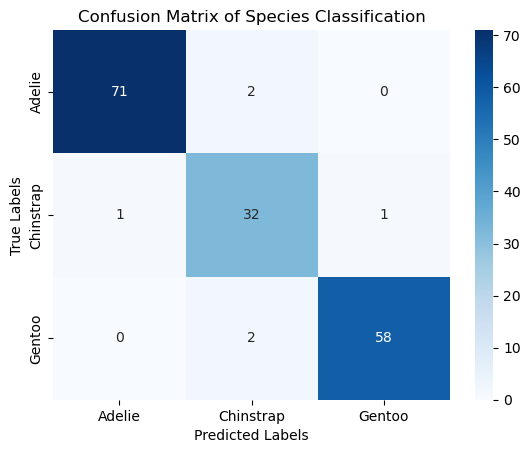

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Load the dataset
df = sns.load_dataset('penguins')

# Drop rows with missing values
df.dropna(inplace=True)


features = ['bill_length_mm', 'bill_depth_mm']

# scale the features
# scaler = StandardScaler()
# df[features] = scaler.fit_transform(df[features])

# Select features
X = df[features]
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0,  stratify=y)

# Initialize and train the logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Calculate the training and test accuracy
score_train = clf.score(X_train, y_train)
score_test = clf.score(X_test, y_test)
print(f"Training accuracy: {score_train:.4f}")
print(f"Test accuracy: {score_test:.4f}")


# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Species Classification')
plt.show()


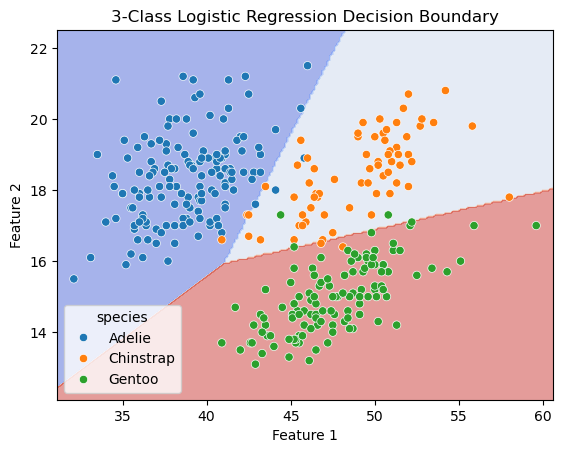

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots()
db_display = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    grid_resolution=200,
    response_method="predict",  # Can be "predict_proba" for probability contours
    cmap='coolwarm',
    alpha=0.5,
    ax=ax
)

# Scatter plot of the data points
scatter = sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')

# Adding title and labels
ax.set_title('3-Class Logistic Regression Decision Boundary')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# Show plot
plt.show()
